In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import timeit
from rpl import RadarSignalProcessing
import sys
# 导入DBReader的目录
sys.path.append('/home/fxf/projects/RADIal_Project/DBReader')
from DBReader.DBReader import SyncReader

## 1. Load the dataset

In [2]:
root_folder = '/home/fxf/data/RADIal_DataSet/raw_sequences/RECORD@2020-11-22_12.28.47'
db = SyncReader(root_folder,tolerance=40000)

-------------------------------------------------------------------------
- Sensors available:
-     radar_ch0
-     scala
-     radar_ch3
-     radar_ch1
-     can
-     radar_ch2
-     camera
-     gps
-
- You might use function "setSensorFilters" to select sensors you want to read!
-------------------------------------------------------------------------
Total tolerance errors:  0.4424778761061947 %
Total corrupted frames:  1.7699115044247788 %


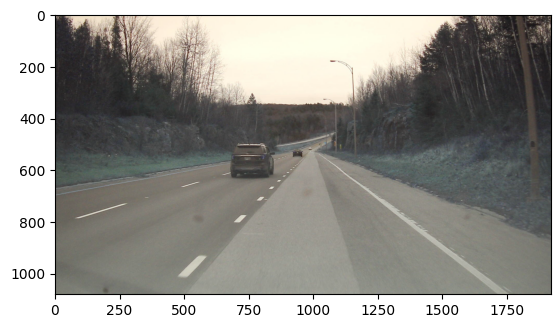

In [3]:
sample = db.GetSensorData(68)
plt.imshow(sample['camera']['data'])

## 2. RadarSignalProcessing to compute Point Cloud 

In [4]:
RSP = RadarSignalProcessing('/home/fxf/projects/RADIal_Project/SignalProcessing/CalibrationTable.npy',method='PC')

CPU will be used to execute the processing


In [5]:
%time pc=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: user 2.66 s, sys: 4.38 s, total: 7.04 s
Wall time: 587 ms


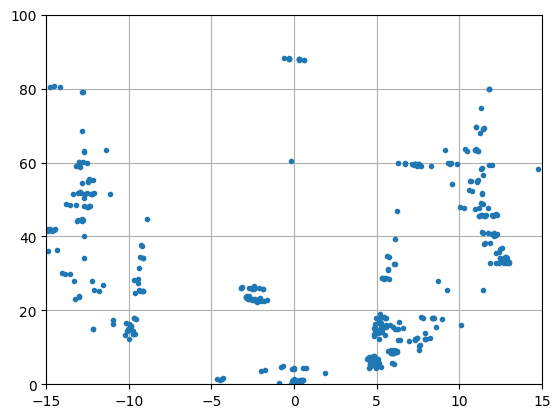

In [6]:
# PC = [Range,Doppler,Azimuth,Elevation]
Az = pc[:,2]
R = pc[:,0]
El = pc[:,3]
z = R*np.sin(El)
El_cos = np.cos(El)
x = R*El_cos*np.cos(Az)
y = R*El_cos*np.sin(Az)
v = pc[:,1]

plt.plot(-y,x,'.')
plt.xlim(-15,15)
plt.ylim(0,100)
plt.grid()

## 3. RadarSignalProcessing to compute Doppler Spectrums

In [7]:
RSP = RadarSignalProcessing('/home/fxf/projects/RADIal_Project/SignalProcessing/CalibrationTable.npy',method='RD')

CPU will be used to execute the processing


In [8]:
%time rd=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: user 85.6 ms, sys: 97.1 ms, total: 183 ms
Wall time: 191 ms


(512, 256, 16) It has 16 channels, one for each Rx antenna


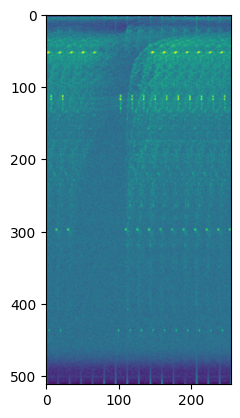

In [9]:
print(rd.shape,'It has 16 channels, one for each Rx antenna')
plt.imshow(np.log10(np.sum(np.abs(rd),axis=2)))

## 4. RadarSignalProcessing to compute Range-Azimuth map

### 4.1 Using CuPy

In [21]:
RSP = RadarSignalProcessing('/home/fxf/projects/RADIal_Project/SignalProcessing/CalibrationTable.npy',method='RA',device='cuda',lib='CuPy')

CuPy on GPU will be used to execute the processing


In [24]:
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: user 694 ms, sys: 118 ms, total: 813 ms
Wall time: 810 ms


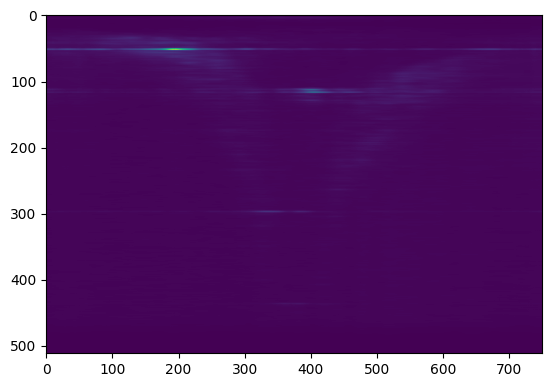

In [23]:
plt.imshow(ra)

### 4.2 Using PyTorch

In [25]:
RSP = RadarSignalProcessing('/home/fxf/projects/RADIal_Project/SignalProcessing/CalibrationTable.npy',method='RA',device='cuda',lib='PyTorch')

PyTorch on GPU will be used to execute the processing


In [ ]:
ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: user 465 ms, sys: 92.6 ms, total: 558 ms
Wall time: 556 ms


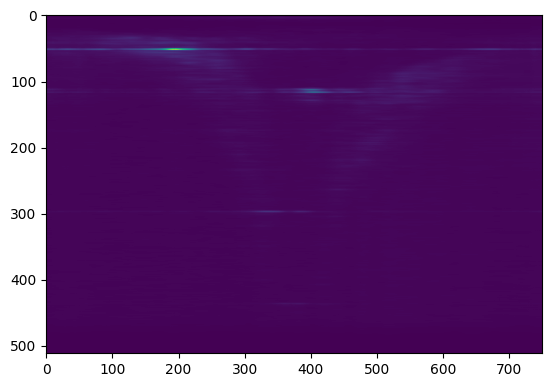

In [27]:
plt.imshow(ra)

### 4.3 Using CPU

In [28]:
RSP = RadarSignalProcessing('/home/fxf/projects/RADIal_Project/SignalProcessing/CalibrationTable.npy',method='RA',device='cpu')

CPU will be used to execute the processing


In [29]:
%time ra=RSP.run(sample['radar_ch0']['data'],sample['radar_ch1']['data'],sample['radar_ch2']['data'],sample['radar_ch3']['data'])

CPU times: user 30.2 s, sys: 37.7 s, total: 1min 7s
Wall time: 11.4 s


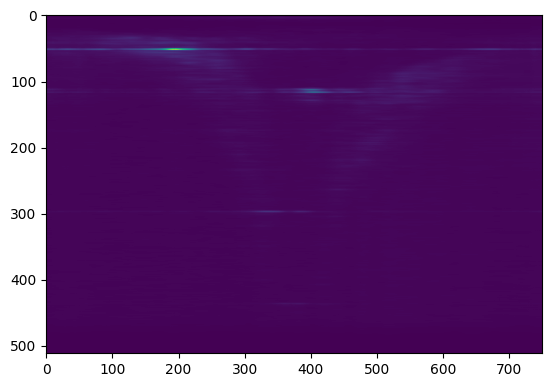

In [30]:
plt.imshow(ra)